In [1]:
from utility_dfplotter import *

# 1. Plot All Kinematics

In [2]:
def plotDataFrames():
    for seletion in ["emu","mumu","mutau","mu4j","ee","emu2","etau","e4j","mu4j_fakes","e4j_fakes"]:
        for nbjet in ["==1",">1"]:
            plotter = DFPlotter(seletion,nbjet)
            plotter.plotKinematics()
plotDataFrames()

making plots -- e4j nbjet>1: 24/24


In [31]:
def plotFakeKinematics(faketype):
    pickles  = glob.glob("../data/pickles/*_{}/mcdiboson/*.pkl".format(faketype))
    MCzz = pd.concat([ pd.read_pickle(pickle) for pickle in pickles], ignore_index=True)

    pickles  = glob.glob("../data/pickles/*_{}/mcdy/*.pkl".format(faketype))
    MCdy = pd.concat([ pd.read_pickle(pickle) for pickle in pickles], ignore_index=True)

    pickles  = glob.glob("../data/pickles/*_{}/mct/*.pkl".format(faketype))
    MCt = pd.concat([ pd.read_pickle(pickle) for pickle in pickles], ignore_index=True)

    pickles  = glob.glob("../data/pickles/*_{}/mctt/ntuple_ttbar_inclusive.pkl".format(faketype))
    MCtt = pd.concat([ pd.read_pickle(pickle) for pickle in pickles], ignore_index=True)

    pickles  = glob.glob("../data/pickles/*_{}/data2016/*.pkl".format(faketype))
    Data = pd.concat([ pd.read_pickle(pickle) for pickle in pickles], ignore_index=True)

    dfList = [MCzz,MCdy,MCt,MCtt,Data]
    
    pp = pd.read_csv("../scripts/plotterItemTables/itemTable_zl.csv")
    for index, row in pp.iterrows():
        v,a,b,step,xl = row["var"],row["lower"],row["upper"],row["step"],row["xlabel"]
        sk = ASingleKinematicPlot(v,a,b,step,dfList)
        sk.settingPlot(xl, ['Diboson','V+Jets','tW','tt','Data'], ['C0','C1','C2','C3','k'])
        sk.makePlot('../plots/kinematics/z{}/'.format(faketype))
        
        print("making plots : {}/{}".format(index+1, len(pp)) )
        clear_output(wait=True)
        plt.close()

In [33]:
plotFakeKinematics('e')

making plots : 21/21


(array([  829.,  1064.,  1571.,  3511., 11008., 11254.,  3174.,  1278.,
          800.,   607.]),
 array([ 76.00138947,  79.00035876,  81.99932806,  84.99829735,
         87.99726664,  90.99623594,  93.99520523,  96.99417452,
         99.99314381, 102.99211311, 105.9910824 ]),
 <a list of 10 Patch objects>)

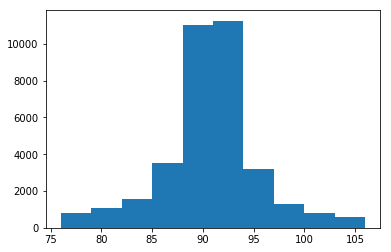

In [12]:
plt.hist(Data.dilepton_mass)

# 2. Make Demo Plots

In [21]:
v,a,b,step,xl = "lepton1_pt",0,200,5,"lepton1_pt"
tr = "e"
plotter = DFPlotter(tr+'tau','==1')
 
sk = ASingleKinematicPlot(v,a,b,step,plotter.getDataFrameList('ss'))
sk.settingPlot(xl, plotter.labelList, plotter.colorList)
sk.makePlot()
fakeProfile = sk.hdata-sk.mctot
sk.axes[0].bar(sk.center,fakeProfile,sk.step,bottom=sk.mctot,color="grey",label="unmodeled "+tr+"j" )
sk.axes[0].legend()
plt.savefig(tr+"tau_ss.png",dpi =300)
plt.close()

sk = ASingleKinematicPlot(v,a,b,step,plotter.getDataFrameList(''))
sk.settingPlot(xl, plotter.labelList, plotter.colorList)
sk.makePlot()
sk.axes[0].bar(sk.center,fakeProfile/1.15,sk.step,bottom=sk.mctot,color="grey",label="unmodeled "+tr+"j" )
sk.axes[0].legend()
plt.savefig(tr+"tau_os.png",dpi =300)
plt.close()

In [38]:
fakeProfile = sk.hdata-sk.mctot

In [23]:
fakeProfile

array([-1.00000000e+00, -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
       -1.00000000e+00, -1.00000000e+00,  1.58414262e+02,  1.05757785e+02,
        6.15076178e+01,  6.74549590e+01,  5.69652185e+01,  5.90822976e+01,
        4.26870025e+01,  7.64271981e+01,  3.44036272e+01,  2.26018865e+01,
        1.37224627e+00,  2.31671154e+01,  3.01520799e+01,  2.36737522e+00,
        2.41857980e+01,  1.97872735e+01,  7.46596887e+00,  5.48515298e+00,
       -9.26752293e-01,  5.34599265e+00, -3.32399978e+00, -2.48702963e+00,
        2.38585589e+00,  7.12616601e-02,  1.06471268e+00,  1.40373214e-01,
        3.52556199e+00, -2.55682318e-01, -8.34024140e-01,  8.81407211e-01,
        2.54636220e+00,  2.62578977e+00, -2.06837572e+00])